In [1]:
import json
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
data = []
with open('tweet/tweets_DM.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
 
f.close()

In [3]:
emotion = pd.read_csv('tweet/emotion.csv')
data_identification = pd.read_csv('tweet/data_identification.csv')

In [4]:
df = pd.DataFrame(data)
_source = df['_source'].apply(lambda x: x['tweet'])
df = pd.DataFrame({
    'tweet_id': _source.apply(lambda x: x['tweet_id']),
    'hashtags': _source.apply(lambda x: x['hashtags']),
    'text': _source.apply(lambda x: x['text']),
})
df = df.merge(data_identification, on='tweet_id', how='left')

train_data = df[df['identification'] == 'train']
test_data = df[df['identification'] == 'test']

In [5]:
train_data = train_data.merge(emotion, on='tweet_id', how='left')
train_data

,tweet_id,hashtags,text,identification,emotion
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1455558,0x321566,"[NoWonder, Happy]",I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,0x38959e,[],In every circumtance I'd like to be thankful t...,train,joy
1455560,0x2cbca6,[blessyou],there's currently two girls walking around the...,train,joy
1455561,0x24faed,[],"Ah, corporate life, where you can date <LH> us...",train,joy


In [6]:
train_data.drop_duplicates(subset=['text'], keep=False, inplace=True)
train_data

,tweet_id,hashtags,text,identification,emotion
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1455558,0x321566,"[NoWonder, Happy]",I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,0x38959e,[],In every circumtance I'd like to be thankful t...,train,joy
1455560,0x2cbca6,[blessyou],there's currently two girls walking around the...,train,joy
1455561,0x24faed,[],"Ah, corporate life, where you can date <LH> us...",train,joy


In [7]:
train_data_sample = train_data.sample(frac=0.3, random_state=42)

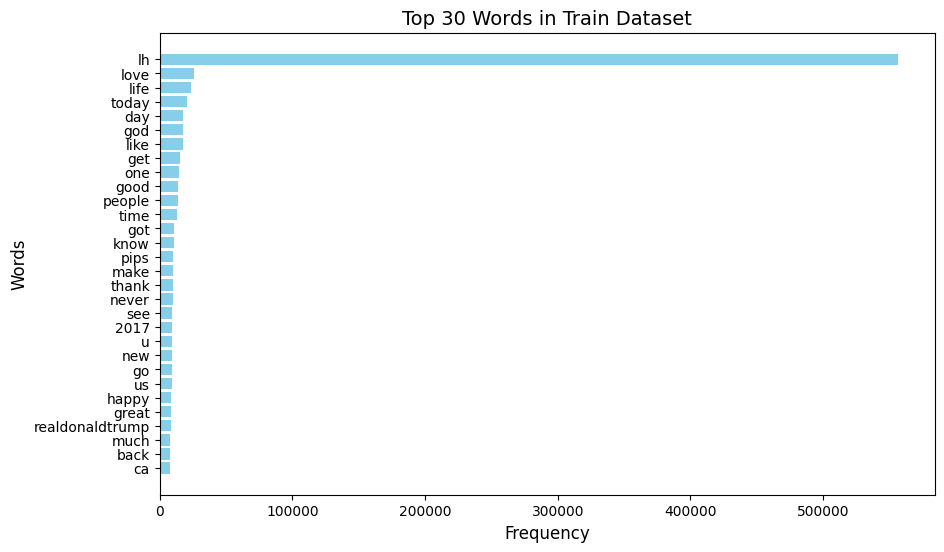

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

def tokenize_and_count(text_list):
    stop_words = set(stopwords.words('english'))
    words = []
    for text in text_list:
        tokens = word_tokenize(text.lower())
        words.extend([word for word in tokens if word.isalnum() and word not in stop_words])
    return Counter(words)

# Get word frequencies for train
train_word_counts = tokenize_and_count(train_data_sample['text'])

# Extract the top 30 words for each dataset
top_train_words = train_word_counts.most_common(30)

# Plot the word frequencies
def plot_word_frequencies(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(title, fontsize=14)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    plt.show()

# Plot for train dataset
plot_word_frequencies(top_train_words, "Top 30 Words in Train Dataset")

In [9]:
train_data_sample.to_pickle("train_dsample.pkl")

In [10]:
train_df = pd.read_pickle("train_dsample.pkl")

emotion
joy             154445
anticipation     74110
trust            61615
sadness          57586
disgust          41614
fear             19076
surprise         14240
anger            12069
Name: count, dtype: int64


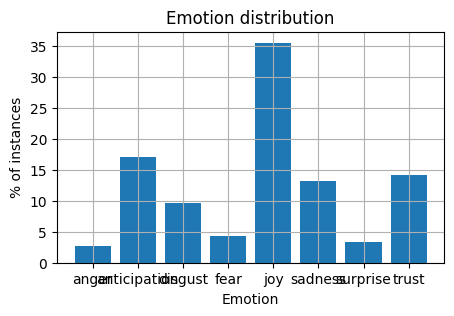

In [11]:
train_df.groupby(['emotion']).count()['text']
print(train_df['emotion'].value_counts())

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [12]:
from sklearn.utils import resample

# 分群處理
minority_classes = train_df['emotion'].value_counts().min()
balanced_df = pd.concat([
    resample(train_df[train_df['emotion'] == emotion], 
             replace=False, # 不重複抽樣
             n_samples=minority_classes, 
             random_state=42)
    for emotion in train_df['emotion'].unique()
])

print(balanced_df['emotion'].value_counts())

emotion
joy             12069
disgust         12069
trust           12069
surprise        12069
anticipation    12069
fear            12069
sadness         12069
anger           12069
Name: count, dtype: int64


In [13]:
import re

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s<LH>]', '', text)
    text = re.sub(r'@\w+', '', text)
    text = ' '.join(text.split())
    text = text.lower()  # 小寫
    return text

balanced_df['text'] = balanced_df['text'].apply(preprocess_text)

In [14]:
def advanced_preprocess_text(text):
    # 移除URL
    text = re.sub(r'http\S+', '', text)
    
    # 移除特殊符號和數字
    text = re.sub(r'[^a-zA-Z\s<LH>]', '', text)
    
    # 處理推特特有的標記如@username
    text = re.sub(r'@\w+', '', text)
    
    # 移除多餘空格
    text = ' '.join(text.split())
    
    text = text.lower()
    
    return text

balanced_df['text'] = balanced_df['text'].apply(advanced_preprocess_text)

Using device: cpu


In [15]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)

def encode_batch(texts, model, tokenizer, batch_size=32, max_length=128):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        # Tokenize and move to device
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=max_length).to(device)
        # Generate embeddings
        with torch.no_grad():  # Disable gradient computation
            outputs = model(**inputs)
            batch_embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling
        embeddings.append(batch_embeddings.cpu())  # Move back to CPU to save memory
    return torch.cat(embeddings)  # Concatenate all batches

texts = balanced_df['text'].tolist()  # 獲取文字資料列表
embeddings = encode_batch(texts, model, tokenizer, batch_size=32)  # 批量處理
balanced_df['embedding'] = list(embeddings.numpy())  # 每個 embedding 存成一個 array
balanced_df.to_pickle('balanced_df_with_embeddings.pkl')


# X = torch.stack(balanced_df['embedding'].values)
# y = balanced_df['emotion']

In [16]:
import numpy as np
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
balanced_df['en_emotion'] = label_encoder.fit_transform(balanced_df['emotion']) 
y = balanced_df['en_emotion']
# 假設 embeddings 是你的 BERT 嵌入，y 是標籤  
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)

# PCA 降到 100 維
pca = PCA(n_components=100)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# 訓練 XGBoost
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train_reduced, y_train)

# 預測並評估
y_pred = xgbmodel.predict(X_test_reduced)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3853762104500026


In [17]:
# 測試集預處理
test_data.loc[:, 'text'] = test_data['text'].apply(preprocess_text)
test_texts = test_data['text'].tolist()

# 生成測試集嵌入
test_embeddings = encode_batch(test_texts, model, tokenizer, batch_size=32)

# 減少維度
test_embeddings_reduced = pca.transform(test_embeddings)

# 預測測試集情緒
test_predictions_encoded = model.predict(test_embeddings_reduced)

# 將數字標籤轉回原始的情緒名稱
test_predictions = label_encoder.inverse_transform(test_predictions_encoded)

# 構造 submission DataFrame
submission = pd.DataFrame({
    'tweet_id': test_data['tweet_id'],
    'emotion': test_predictions
})

# 保存為 CSV 文件
submission.to_csv('submission_t.csv', index=False)

print("Submission file saved as 'submission_t.csv'")

AttributeError: 'DistilBertModel' object has no attribute 'predict'

In [ ]:
X_test_data = test_data.drop(['tweet_id', 'identification', 'hashtags'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = torch.stack(balanced_df['embedding'].values)  # 轉成 tensor
y = balanced_df['emotion']

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練 Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# 預測與評估
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not numpy.ndarray

In [8]:
y_train_data = train_data_sample['emotion']
X_train_data = train_data_sample.drop(['tweet_id', 'emotion', 'identification', 'hashtags'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42, stratify=y_train_data)

In [10]:
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(X_train['text']).toarray()
X_test = tfidf.transform(X_test['text'])

In [11]:
le = LabelEncoder()
y = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [12]:
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.48188059941806305

In [23]:
X_test_data = test_data.drop(['tweet_id', 'identification', 'hashtags'], axis=1)

In [16]:
X_test_data = tfidf.transform(X_test_data['text']).toarray()

In [17]:
y_test_pred = clf.predict(X_test_data)

In [18]:
y_pred_labels = le.inverse_transform(y_test_pred)
y_pred_labels

array(['anticipation', 'anticipation', 'joy', ..., 'joy', 'joy', 'joy'],
      dtype=object)

In [35]:
submission = pd.DataFrame({
    'id': test_data['tweet_id'],
    'emotion': y_pred_labels
}).reset_index(drop=True)
submission.to_csv('submission.csv', index=False)

In [36]:
submission

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,joy
3,0x2939d5,joy
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,joy
411970,0x29d0cb,joy


In [27]:
sample = pd.read_csv('tweet/sampleSubmission.csv')
sample

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


In [29]:
test_data

,tweet_id,hashtags,text,identification
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",test
4,0x2de201,[],"""Trust is not the same as faith. A friend is s...",test
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,test
30,0x2939d5,"[GodsPlan, GodsWork]","God woke you up, now chase the day #GodsPlan #...",test
33,0x26289a,[],"In these tough times, who do YOU turn to as yo...",test
...,...,...,...,...
1867525,0x2913b4,[],"""For this is the message that ye heard from th...",test
1867529,0x2a980e,[],"""There is a lad here, which hath five barley l...",test
1867530,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,test
1867531,0x29d0cb,[],I swear all this hard work gone pay off one da...,test
